# Drzewa decyzyjne #

Będziemy dziś pracować na [zbiorze danych](http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29) uzyskanych z biopsji (aspiracyjnej cienkoigłowej) piersi. Zadaniem naszym jest wytrenowanie klasyfikatora, który po cechach wyników biopsji będzie klasyfikował guz jako łagodny lub złośliwy.

### Przygotowanie środowiska programistycznego

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from termcolor import colored

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def printScores(model, X, Y):
    print(colored("Classification report:","blue"))
    print(classification_report(Y, model.predict(X)))
    print(colored("Confusion matrix:","blue"))
    print(confusion_matrix(Y, model.predict(X)))

## Zbiór danych "cancer"
Dla wygodny ponownie umieścimy dane w `pandas.DataFrame`.

**Proszę:**
- załadować dane za pomocą `sklearn.dataset.load_breast_cancer`,
- umieścić dane w `pandas.DataFrame`
- dodać kolumnę `label` wypełnioną wartościami ```cancer.target```
- wypisać nazwy klas i cech

Oczekiwany wynik:
```Python
Nazwy klas: ['malignant' 'benign']
Nazwy cech: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
```

In [2]:
...
pass

Nazwy klas: ['malignant' 'benign']
Nazwy cech: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


**Proszę:**

* wypisać na ekran liczebność klas
* narysować wykresy skrzypcowe dla poszczególnych cech z podziałem na gatunki,
* na podstawie rysunków ustalić czy cechy wymagają normalizacji. Czy normalizacja potrzebna w przypadku drzew decyzyjnych?

**Wskazówki** 
* zliczając klasy można skorzystać z metody ```DataFrame.groupby(...).count()```
* wykres skrzypcowy proszę narysować korzystając z kodu z notatnika `06_Klasyfikator_Bayesa_irysy`

Oczekiwany wynik:
```Python
Class counts:
 label
0    212
1    357
Name: label, dtype: int64
```

Class counts:
 label
0    212
1    357
Name: label, dtype: int64


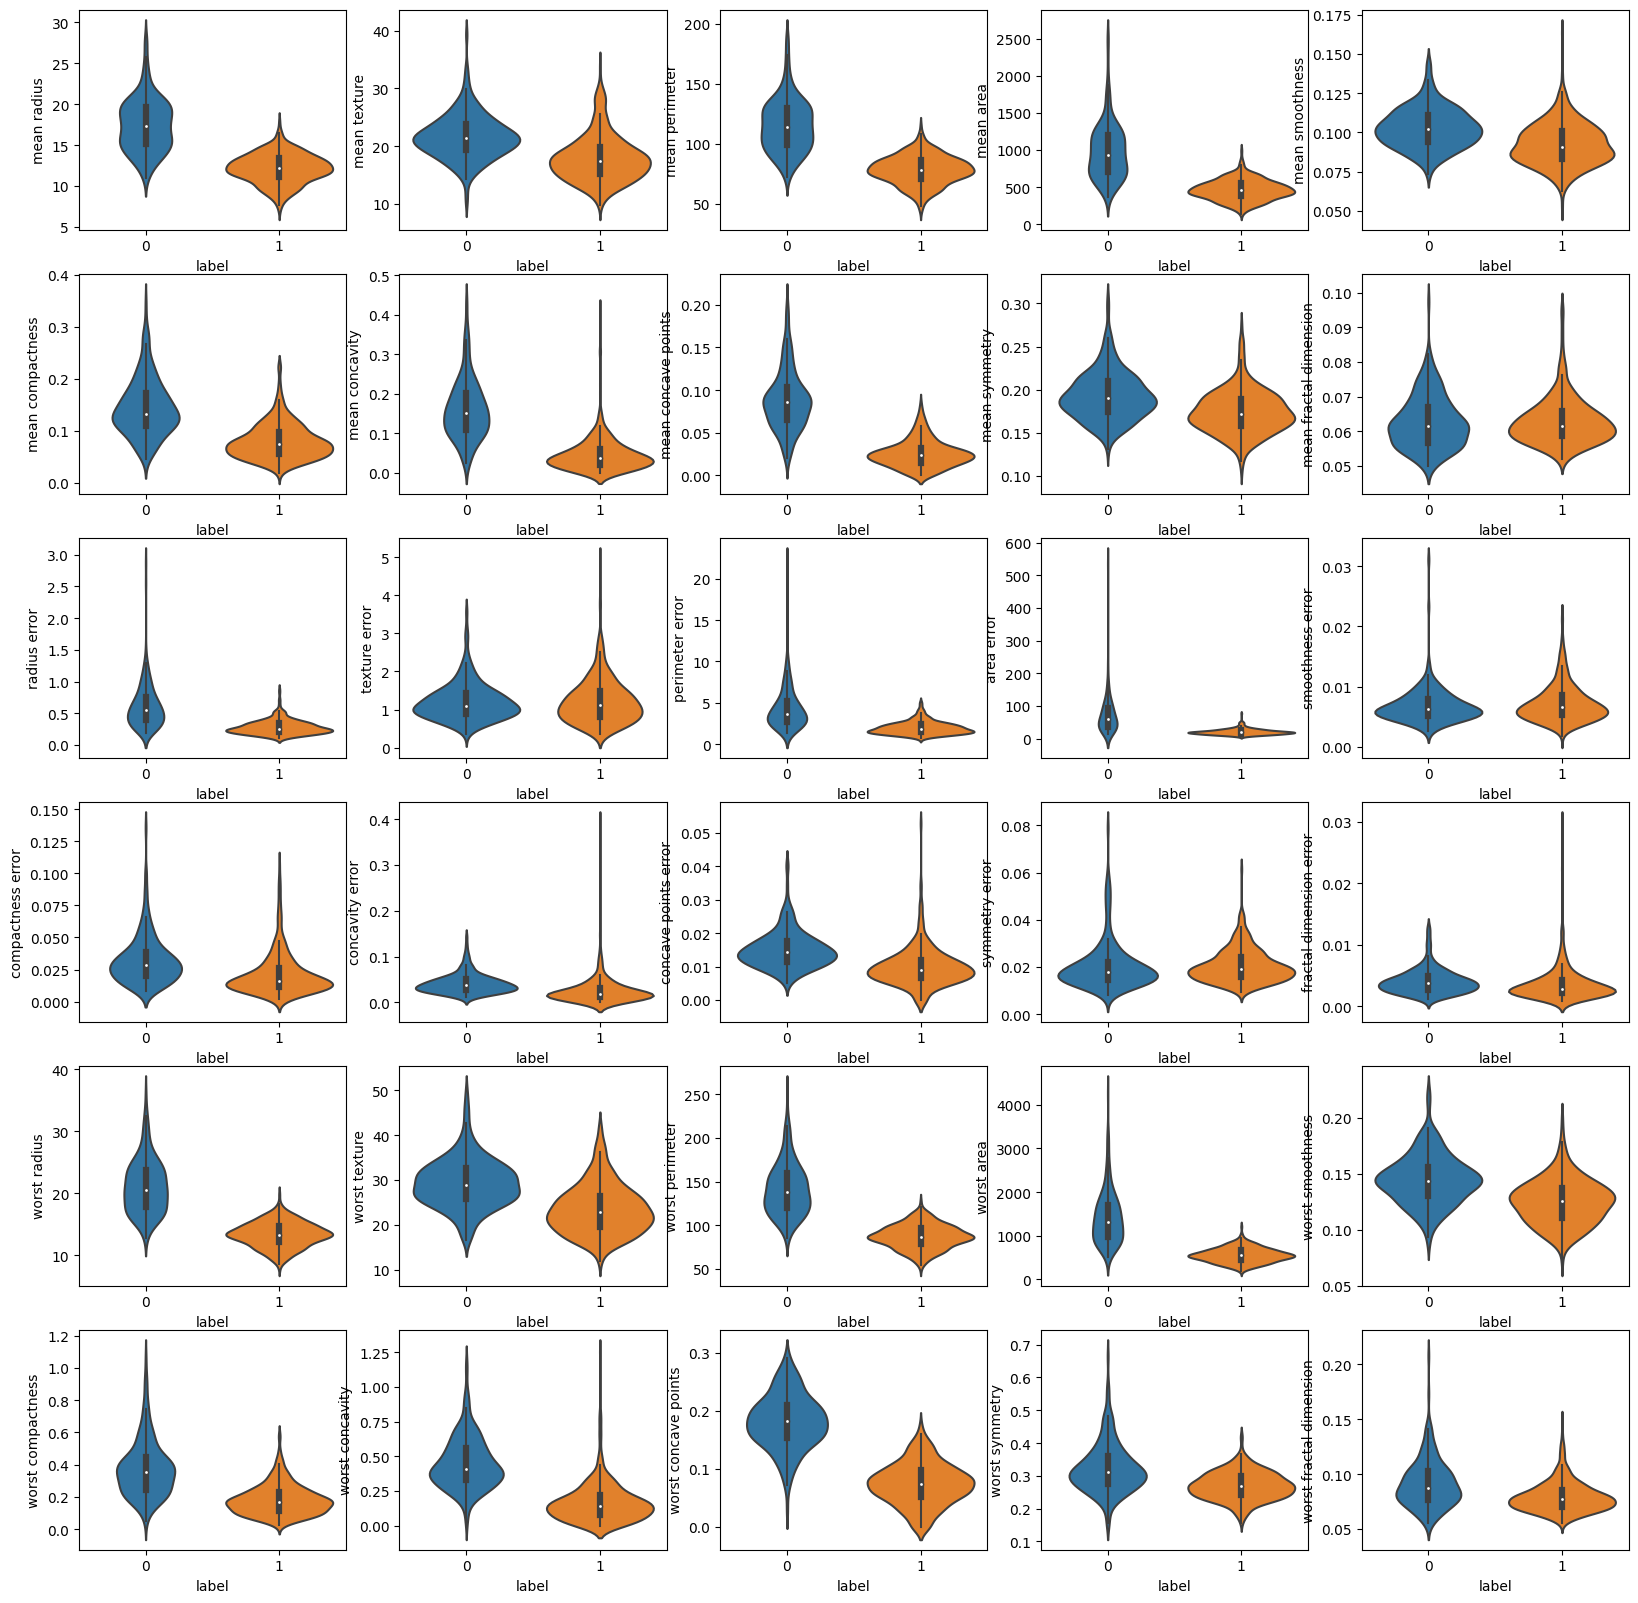

In [3]:
...
pass

**Proszę:** 

* narysować macierz korelacji (nie kowariancji!)

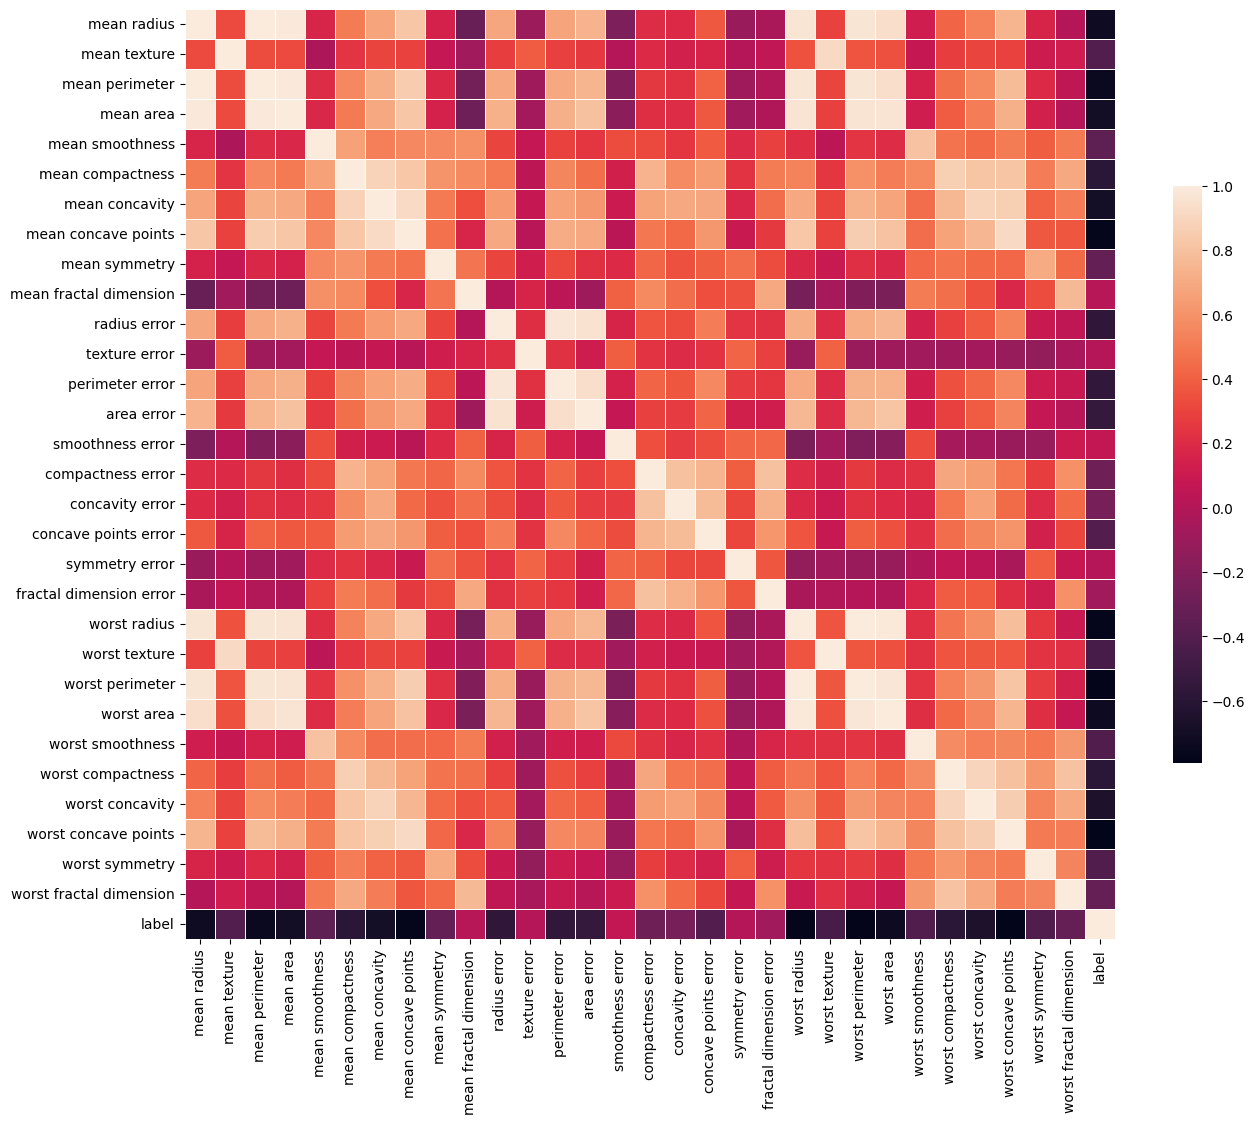

In [4]:
...
pass

**Proszę:**
* podzielić dane na części uczącą i walidacyjną w proporcjach 80:20

**Uwaga**: można użyć parametru ```random_state=0``` by umożliwić porównanie wyników z innymi osobami

**Wskazówka**: proszę skorzystać z funkcji ```sklearn.model_selection.train_test_split```

In [5]:
...
pass

Train dataset:
 count    455.000000
mean       0.637363
std        0.481291
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: label, dtype: float64
Test dataset:
 count    114.000000
mean       0.587719
std        0.494418
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: label, dtype: float64


## Definicja i trening klasyfikatora

W bibliotece scikit-learn drzewa decyzyjne implementowane są przez klasę [DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier). Szczegóły implementacji opisane są [tutaj](https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use).


**Proszę:**

* utworzyć obiekt ```dtc``` klasy DecisionTreeClassifier
* przeprowadzić trening

In [6]:
...
X = df_train.drop(columns='label').iloc[0:1]
print(colored("Ścieżka decyzyjna dla wybranego przykładu:\n","blue"), dtc.decision_path(X))
pass

Ścieżka decyzyjna dla wybranego przykładu:
   (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 11)	1
  (0, 12)	1


# Wizualizacja drzewa

Po wytrenowaniu można zilustrować drzewo decyzyjne.

* za pomocą narzędzia Graphiz. Może to wymagać zainstalowania w systemie tego narzędzia, oraz biblioteki pydot:

```Python
!pip3 install graphviz pydotplus
```

Otrzymany rysunek można obejrzeć klikając w menu po lewej, lub wyświetlając go w komórce.

In [7]:
!pip3 install graphviz pydotplus

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip


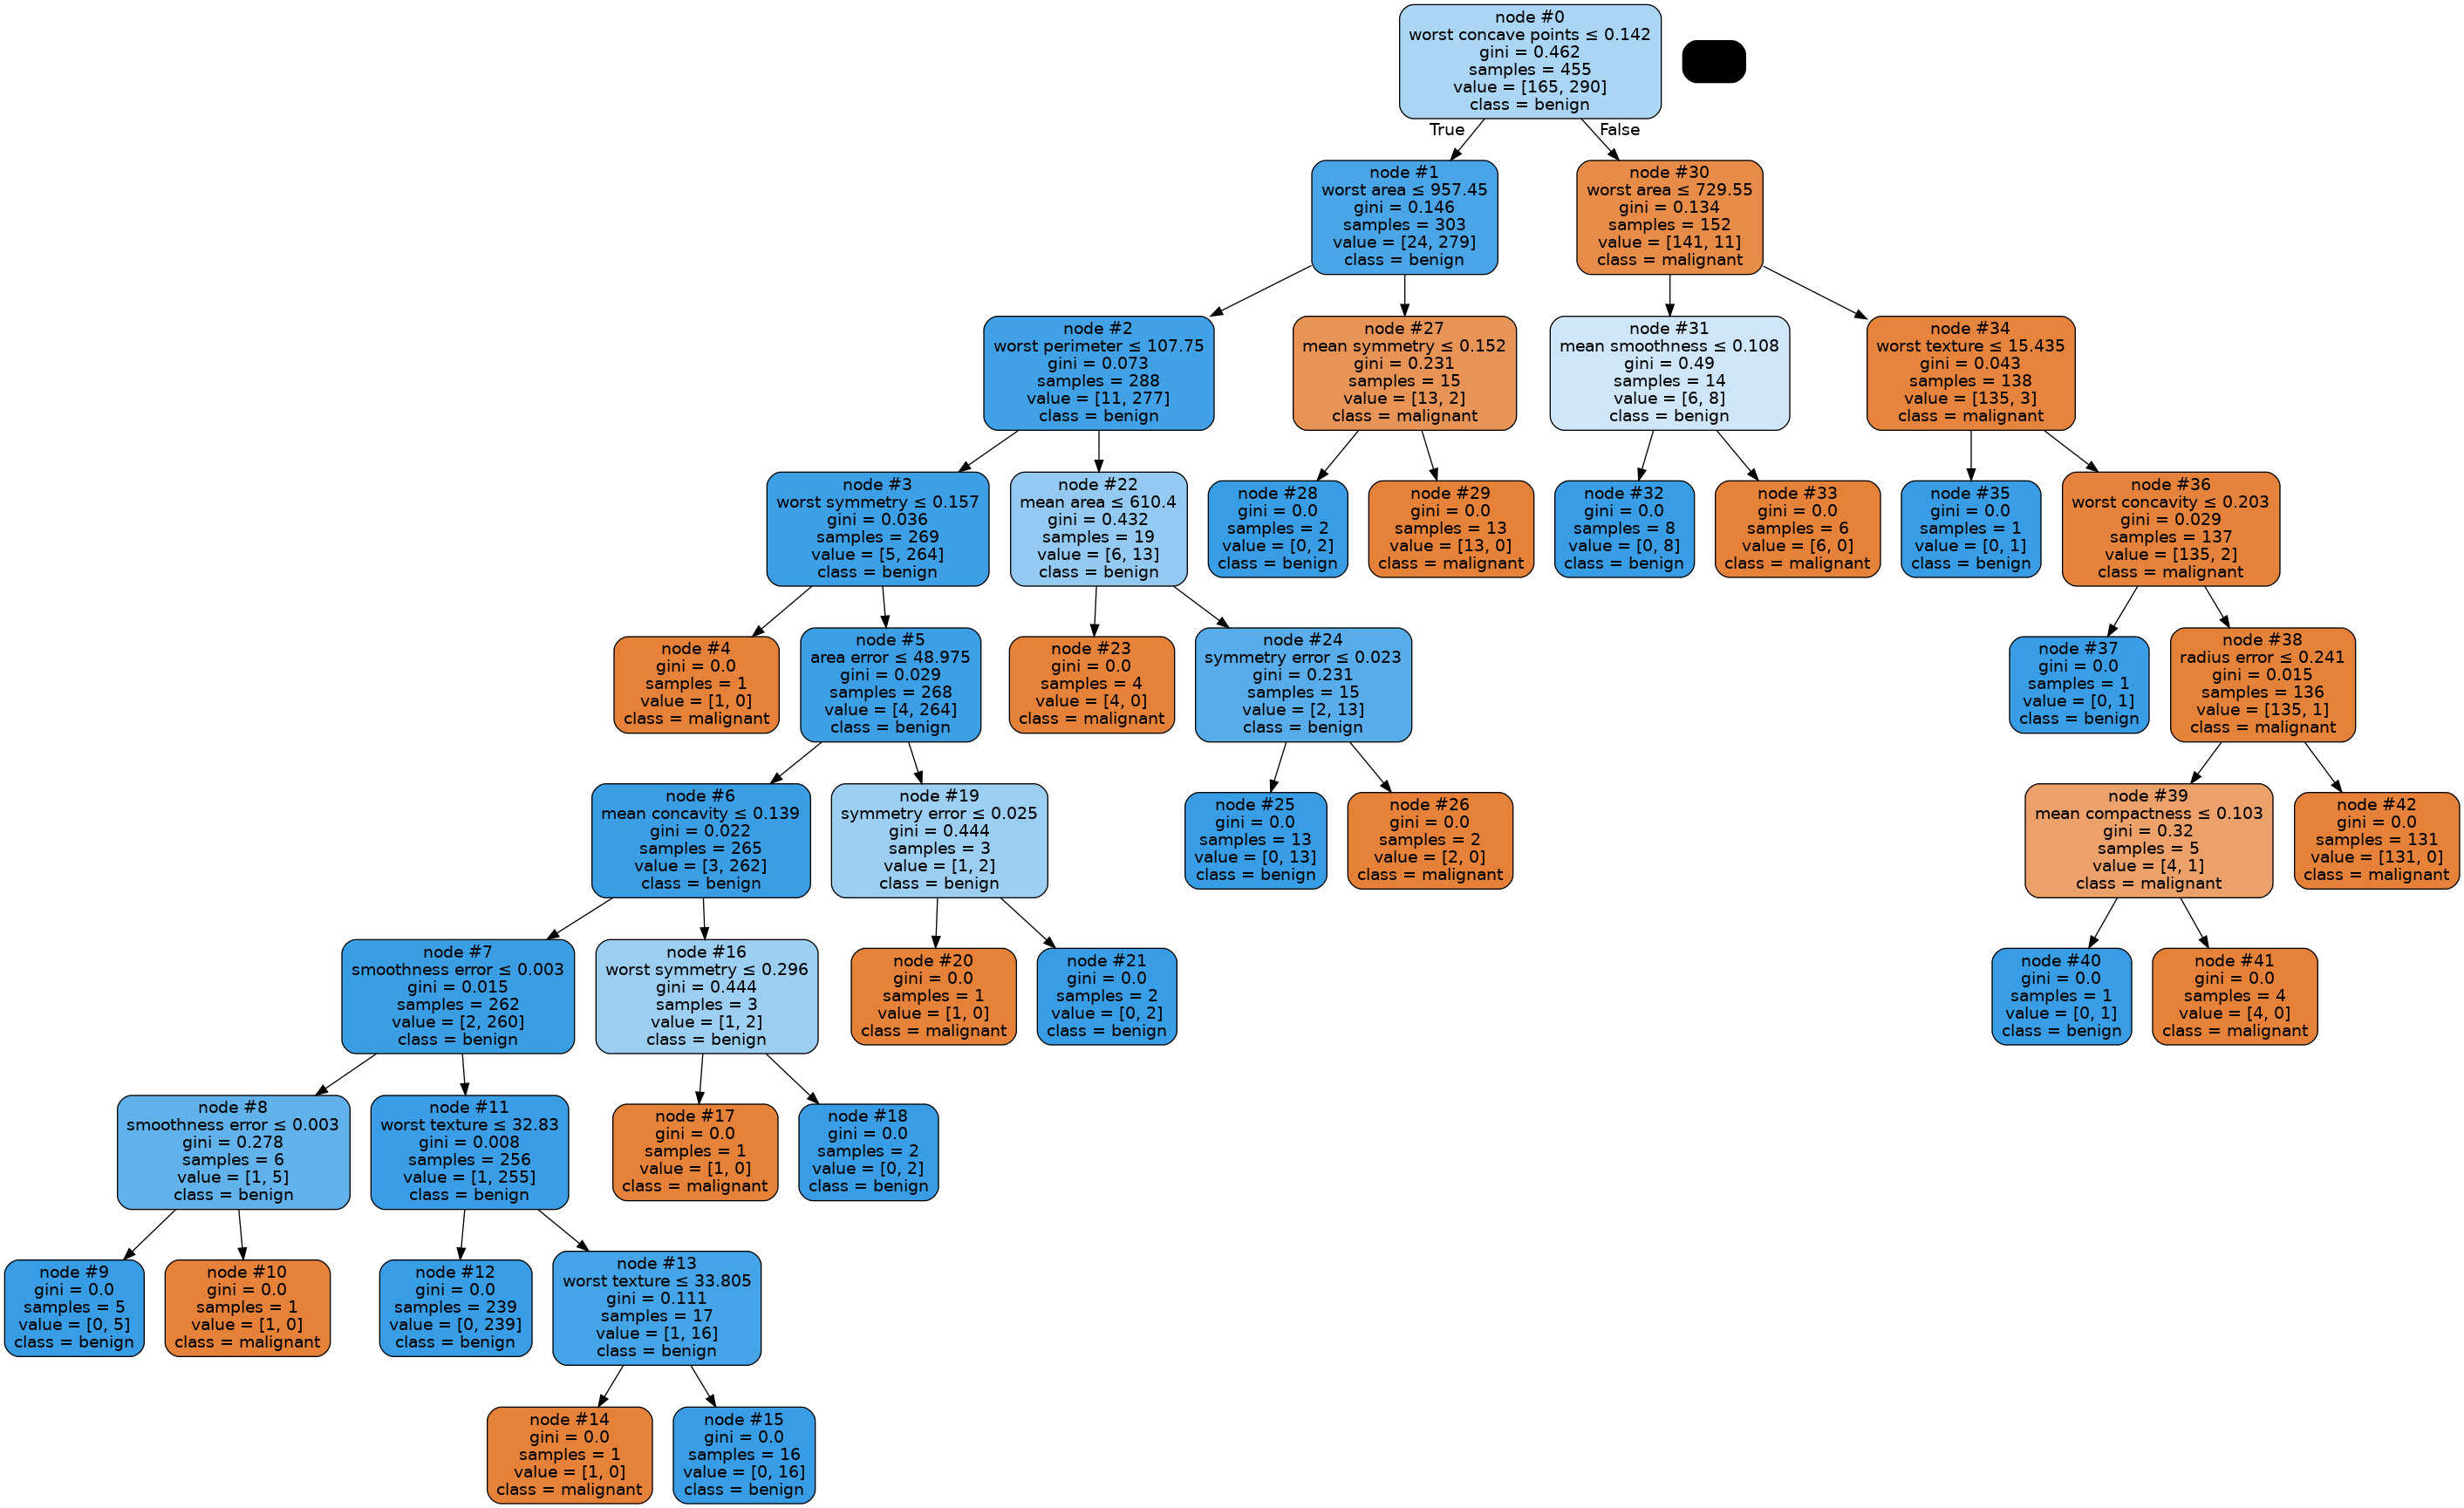

In [8]:
import pydotplus
import io
from IPython.display import Image
from sklearn.tree import export_graphviz

dot_data = io.StringIO()
export_graphviz(dtc, out_file=dot_data,
                    filled=True, rounded=True,
                    rotate=False,
                    node_ids = True,
                    special_characters=True,
                    leaves_parallel=False,
                    feature_names = cancer.feature_names,
                    class_names=cancer.target_names,
                   )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png');

from IPython.display import Image
Image(graph.create_png())

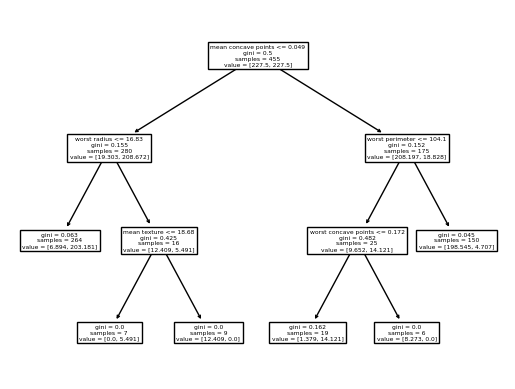

In [32]:
from sklearn.tree import plot_tree

plot_tree(dtc, feature_names=list(cancer.feature_names));

**Proszę:**

* wypisać na ekran raport klasyfikacji oraz macierz pomyłek dla zbioru **walidacyjnego**
* wypisać na ekran raport klasyfikacji oraz macierz pomyłek dla zbioru **treningowego**
* proszę wyciągnąć wnioski z tych raportów

In [15]:
...
pass

Train dataset. Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       290

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

Confusion matrix:
[[165   0]
 [  0 290]]
Validation dataset: Classification report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        47
           1       0.97      0.88      0.92        67

    accuracy                           0.91       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114

Confusion matrix:
[[45  2]
 [ 8 59]]


# Analiza ważności cech

Komórka poniżej tworzy wykres szeregujący cechy według ich wpływu na wynik klasyfikacji.

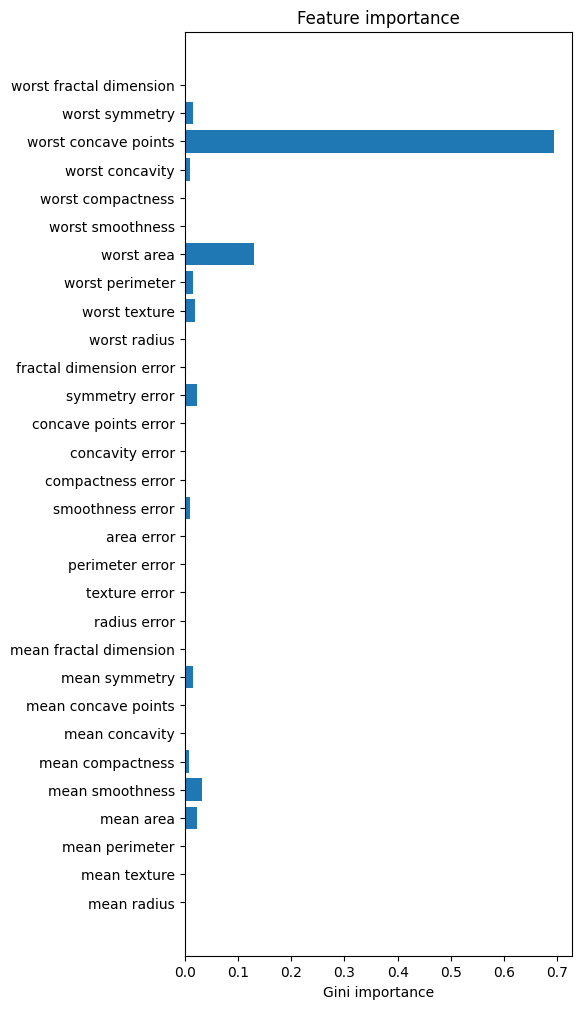

In [16]:
plt.figure(figsize=(5,12))
fi = dtc.feature_importances_
plt.barh(cancer.feature_names, fi)
plt.title('Feature importance')
plt.xlabel('Gini importance');

## Regularyzacja drzewa 


W przypadku drzew decyzyjnych regularyzacja polega przede wszystkim na:
- przycinaniu gałęzi i liści (czyli zmniejszaniu liczby węzłów) przez kontrolę parametru `min_samples_leaf` który zadaje daje dolne ograniczenie na liczbę przykładów w liściu drzewa. Jeśli kolejna gałązka miałaby rozpatrywać liczbę przykładów `< min_sample_leaf`, to nie tworzy się.
- ograniczaniu głębokości drzewa, którym steruje parametr `max_depth`

**Proszę:**

* sprawdzić jaka jest domyślna wartość parametrów `min_sample_leaf` i `max_depth`
* proszę wytrenować klasyfikatory z różnymi wartościami parametrów `min_sample_leaf` i `max_depth` i wybrać ten który daje najlepsze wyniki na zbiorze walidacyjnym.

**Wskazówka**: powtarzalną procedurę treningu i walidacji drzewa dla różnych hiperparametrów najlepiej zawrzeć w dedykowanej funkcji.

In [19]:
...
pass

Model params: max_depth=10, min_samples_leaf=10
Validation dataset. Classification report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        47
           1       0.96      0.99      0.97        67

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion matrix:
[[44  3]
 [ 1 66]]
Model params: max_depth=5, min_samples_leaf=10
Validation dataset. Classification report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        47
           1       0.96      0.99      0.97        67

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion matrix:
[[44  3]
 [ 1 66]]
Model params: max_depth=5, min_samples_leaf=1
Validation dataset. Classification report:
  

### Automatyczne skanowanie parametrów drzewa

Istnieją automatyczne algorytmy do poszukiwania optymalnych parametrów drzewa, np. `cost_complexity_pruning_path` które są sterowane przez jeden parameter: cost complexity parameter w skrócie  `ccp_alpha`. 

**Proszę:**

* skorzystać z metody `DecisionTreeClassifier.cost_complexity_pruning_path()` i narysować wykres zanieczyszczeń, `impurity`, w funkcji `cpp_alpha`

**Wskazówka:** proszę skorzystać z [dokumentacji](https://scikit-learn.org/0.22/auto_examples/tree/plot_cost_complexity_pruning.html)

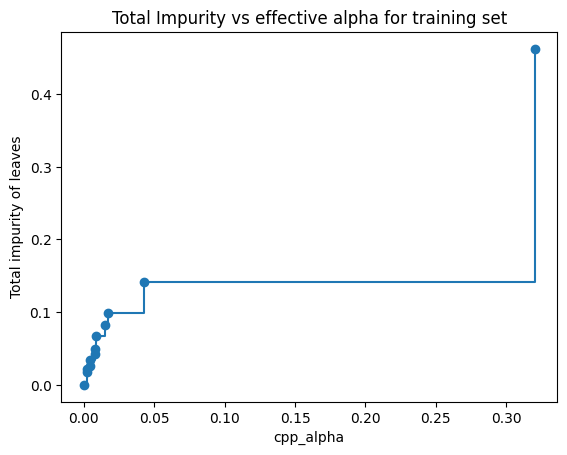

In [20]:
...
pass

**Proszę:**

* wytrenować drzewa dla każdej wartości parametru ```ccp_alpha``` uzyskanej z funkcji `cost_complexity_pruning_path`
* wytrenowane drzewa zachować w liście ```dtcls```

In [21]:
...
pass

Number of nodes in the last tree is: 1 with ccp_alpha: 0.32


**Proszę:**

* narysować wykres liczby węzłów wytrenowanych drzew w funkcji wartości parametru `cpp_alpha`
* narysować wykres głębokości wytrenowanych drzew w funkcji wartości parametru `cpp_alpha`

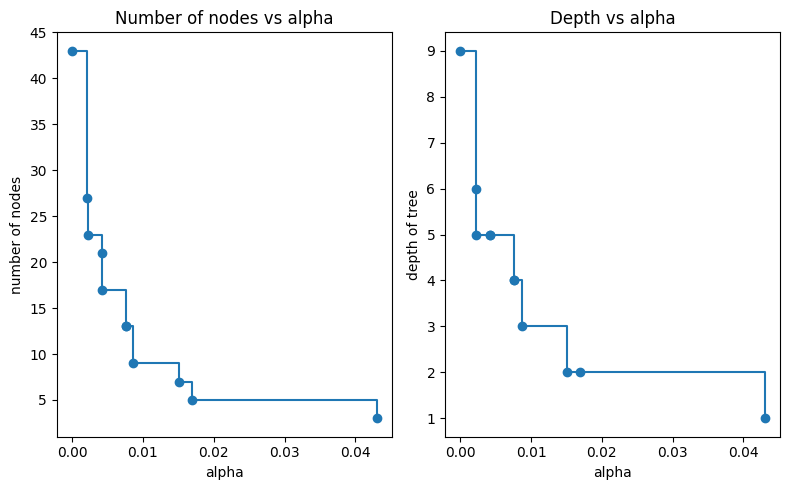

In [24]:
...
pass

## Proszę:

* narysować dokładność (ang. accuracy) w funkcji parametru ```ccp_alpha``` dla zbiorów uczącego i walidacyjnego

**Wskazówka**: mozna użyć metody `DecisionTreeClassifier.score()`

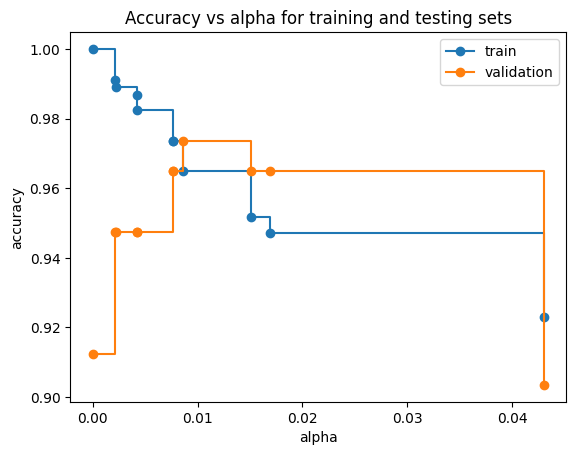

In [26]:
...
pass

**Proszę:**

* na podstawie rysunku z poprzedniej komórki wybrać optymalną wartość ```cpp_alpha``` i dla drzewa określonego przez ten parametr wypisać raport klasyfikacji oraz narysować drzewo

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        47
           1       0.97      0.99      0.98        67

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion matrix:
[[45  2]
 [ 1 66]]


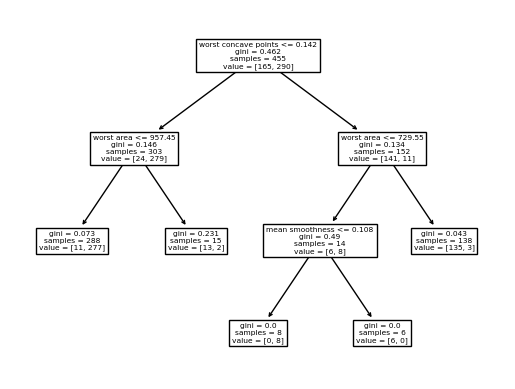

In [29]:
...
pass

**Proszę:**


* zadać wagi próbek tak, by ważona suma wszystkich próbek obu klas była taka sama, tzn. jeżeli masz 10 próbek klasy A i 5 próbek klasy B, 
  to możesz dać próbkom z klasy A wagę 0.5 a próbkom z klasy B wagę 1.0. 
* sprawdzić czy wagi są poprawne
* przeprowadzić trening na danych ważonych z użyciem optymalnej wartości parametrów ```cpp_alpha```
* porównać jakość klasyfikacji z treningiem na danych oryginalnych

**Wskazówka** do obliczania wag proszę użyć funkcji ```sklearn.utils.class_weight.compute_sample_weight```

Suma wag dla klasy 0: 227.5
Suma wag dla klasy 1: 227.5
Model trenowany na danych ważonych
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        47
           1       0.97      0.94      0.95        67

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

Confusion matrix:
[[45  2]
 [ 4 63]]


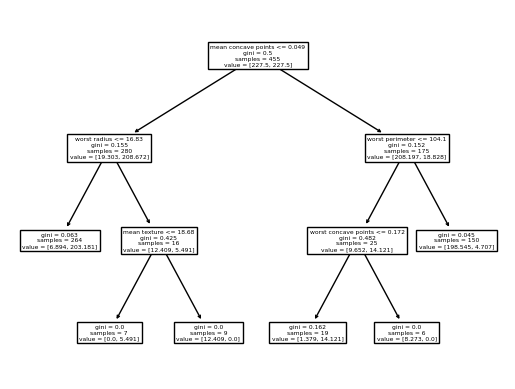

In [31]:
...
pass